### Combining the required results from the other 2 notebooks to make figures

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re

plt.rcParams['svg.fonttype'] = 'none'

In [3]:
filtered_foldseek_str_hits_df = pd.read_csv("/mnt/researchdrive/Kaustubh/MMO/data/foldseek_search/hit_AF_structures_database/TM_score_above_5_structural_comparison/filtered_hits_all_info_df.tsv", sep="\t")
filtered_foldseek_str_hits_df

,query,target,fident,alnlen,mismatch,gapopen,qstart,qend,tstart,tend,...,Length,Taxonomic lineage,major_group,lineage_dict,superkingdom,phylum,class,order,aa_seq_id_wrt_1MTY,3di_seq_id_wrt_1MTY
0,1MTY_D,AF-A0A4R8HNW2-F1-model_v4,0.824,512,90,0,1,512,15,526,...,526.0,"cellular organisms (no rank), Bacteria (superk...",Methane_monooxygenase,"{'no rank': 'unclassified Methylosinus', 'supe...",Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,82.0,79.0
1,1MTY_D,AF-Q842H7-F1-model_v4,0.836,397,65,0,53,449,2,398,...,398.0,"cellular organisms (no rank), Bacteria (superk...",Methane_monooxygenase,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,83.0,74.0
2,1MTY_D,AF-A0A395D1H6-F1-model_v4,0.849,378,57,0,1,378,15,392,...,394.0,"cellular organisms (no rank), Bacteria (superk...",Methane_monooxygenase,"{'no rank': 'unclassified Methylocystaceae', '...",Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,85.0,77.0
3,1MTY_D,AF-Q8KM74-F1-model_v4,0.820,400,72,0,48,447,1,400,...,400.0,"cellular organisms (no rank), Bacteria (superk...",Methane_monooxygenase,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Pseudomonadota,Alphaproteobacteria,Hyphomicrobiales,82.0,74.0
4,1MTY_D,AF-A0A3N0GIB9-F1-model_v4,0.314,508,333,8,6,508,1,498,...,501.0,"cellular organisms (no rank), Bacteria (superk...",Propane_monooxygenase,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,29.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1MTY_D,AF-A0A1M5GG32-F1-model_v4,0.095,324,241,15,1,286,9,318,...,319.0,"cellular organisms (no rank), Bacteria (superk...",Others,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Bacteroidota,Chitinophagia,Chitinophagales,5.0,24.0
268,1MTY_D,AF-A0A1F4X6N4-F1-model_v4,0.065,228,191,7,53,273,3,215,...,221.0,"cellular organisms (no rank), Bacteria (superk...",Different_hydrolases,{'no rank': 'unclassified Candidatus Zixiibact...,Bacteria,Zixiibacteriota,NaN,NaN,2.0,14.0
269,1MTY_D,AF-A0A5J4Z166-F1-model_v4,0.064,233,178,8,59,272,3,214,...,215.0,"cellular organisms (no rank), Eukaryota (super...",Others,"{'no rank': 'cellular organisms', 'superkingdo...",Eukaryota,Rhodophyta,Bangiophyceae,Porphyridiales,3.0,14.0
270,1MTY_D,AF-A0A345JSP8-F1-model_v4,0.049,203,171,6,53,239,3,199,...,200.0,"cellular organisms (no rank), Bacteria (superk...",Others,"{'no rank': 'cellular organisms', 'superkingdo...",Bacteria,Pseudomonadota,Gammaproteobacteria,Thiotrichales,3.0,13.0


In [4]:
filtered_blastp_seq_hits_df = pd.read_csv("/mnt/researchdrive/Kaustubh/MMO/data/blast_search/blastp_uniref50/filtered_blastp_uniref50_hits_all_info_df.tsv", sep="\t")
filtered_blastp_seq_hits_df

,Accession,Description,Organism,Length,Score(Bits),Identities(%),Positives(%),E_value,log10_neg_evalue,Reviewed,Entry Name,Protein names,Gene Names,Taxonomic lineage,Sequence,Reference sequence,major_group,id,aa_seq_id_wrt_1MTY
0,P22869,Methane monooxygenase component A alpha chain ...,Bacteria,527,2872,100.0,100.0,0.000000e+00,200.000000,reviewed,MEMA_METCA,Methane monooxygenase component A alpha chain ...,mmoX MCA1194,"cellular organisms (no rank), Bacteria (domain...",MALSTATKAATDALAANRAPTSVNAQEVHRWLQSFNWDFKNNRTKY...,NaN,Methane_monooxygenase,P22869,NaN
1,Q8KMH0,Soluble methane monooxygenase component A alph...,Bacteria,398,1869,83.2,90.7,0.000000e+00,200.000000,unreviewed,Q8KMH0_METSR,Soluble methane monooxygenase component A alph...,mmoX,"cellular organisms (no rank), Bacteria (domain...",VIAKEYARMEAAKDERQFGTLLDGLTRLGAGNKVHPRWGETMKVIS...,NaN,Methane_monooxygenase,Q8KMH0,83.0
2,E0WMN7,Soluble methane monooxygenase alpha subunit (F...,cellular organisms,372,1743,84.5,91.6,0.000000e+00,200.000000,unreviewed,E0WMN7_9HYPH,Soluble methane monooxygenase alpha subunit,mmoX,"cellular organisms (no rank), Bacteria (domain...",MESVKDERQFGTLLDGLTRLEAGNRVHPRWGETMKVASNFLEVGEY...,NaN,Methane_monooxygenase,E0WMN7,81.0
3,Q934P5,Soluble methane monooxygenase hydroxylase (Fra...,Bacteria,286,1338,81.5,88.5,0.000000e+00,200.000000,unreviewed,Q934P5_9BACT,Soluble methane monooxygenase hydroxylase,mmoX,"cellular organisms (no rank), Bacteria (domain...",LWKGMXRVFADGFISGDAVXCSVNFQLVGEACFTNPLIVAVTEWAS...,NaN,Methane_monooxygenase,Q934P5,82.0
4,Q8L2N2,Soluble methane monooxygenase (Fragment) n=353...,Bacteria,264,1301,89.8,95.5,1.200000e-176,175.920819,unreviewed,Q8L2N2_9GAMM,Soluble methane monooxygenase,mmoX,"cellular organisms (no rank), Bacteria (domain...",TKEQFKLIAKEYARMESVKDERQFGSLQDVLTRVDAANRVHPKWNE...,NaN,Methane_monooxygenase,Q8L2N2,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,W0UE87,Soluble diiron monooxygenase (Fragment) n=7 Ta...,Bacteria,132,97,28.7,40.9,1.900000e-01,0.721246,unreviewed,W0UE87_9BACT,Soluble diiron monooxygenase,rhmo,"cellular organisms (no rank), Bacteria (domain...",ELRHGQTQVHTISHYNKYFDGIGEFPHMHDRVWYLSVPKSFFDDAR...,NaN,Other_monooxygenase,W0UE87,24.0
113,A0A957VW64,Methane monooxygenase (Fragment) n=1 Tax=Anaer...,Anaerolineae bacterium,104,93,42.2,64.4,3.800000e-01,0.420216,unreviewed,A0A957VW64_9CHLR,Methane monooxygenase,KDI79_13585,"cellular organisms (no rank), Bacteria (domain...",AFAGEYEGRPTPAMGRFSGKREWETVYHGWTLDKALVDLGFVRNDG...,NaN,Methane_monooxygenase,A0A957VW64,26.0
114,D2K2D8,propane 2-monooxygenase n=10 Tax=Actinomycetes...,Actinomycetes,318,99,26.4,42.7,5.100000e-01,0.292430,unreviewed,D2K2D8_MYCCN,propane 2-monooxygenase (EC 1.14.13.227),etnA,"cellular organisms (no rank), Bacteria (domain...",MAVSHIPPQRKALSGNRTFGWVTPKGKRPTEYEDLTVGQQSTPAQF...,NaN,Propane_monooxygenase,D2K2D8,9.0
115,A0A923M441,Trehalose-6-phosphate synthase n=9 Tax=Pseudom...,Pseudomonadota,476,98,33.3,43.0,8.700000e-01,0.060481,unreviewed,A0A923M441_9BURK,Trehalose-6-phosphate synthase (EC 2.4.1.15) (...,otsA H8R02_03755,"cellular organisms (no rank), Bacteria (domain...",MGHRDLGQPRLVVVSNRIADPRKTAAGGLAVALADVLNSTGGLWFG...,NaN,Other,A0A923M441,8.0


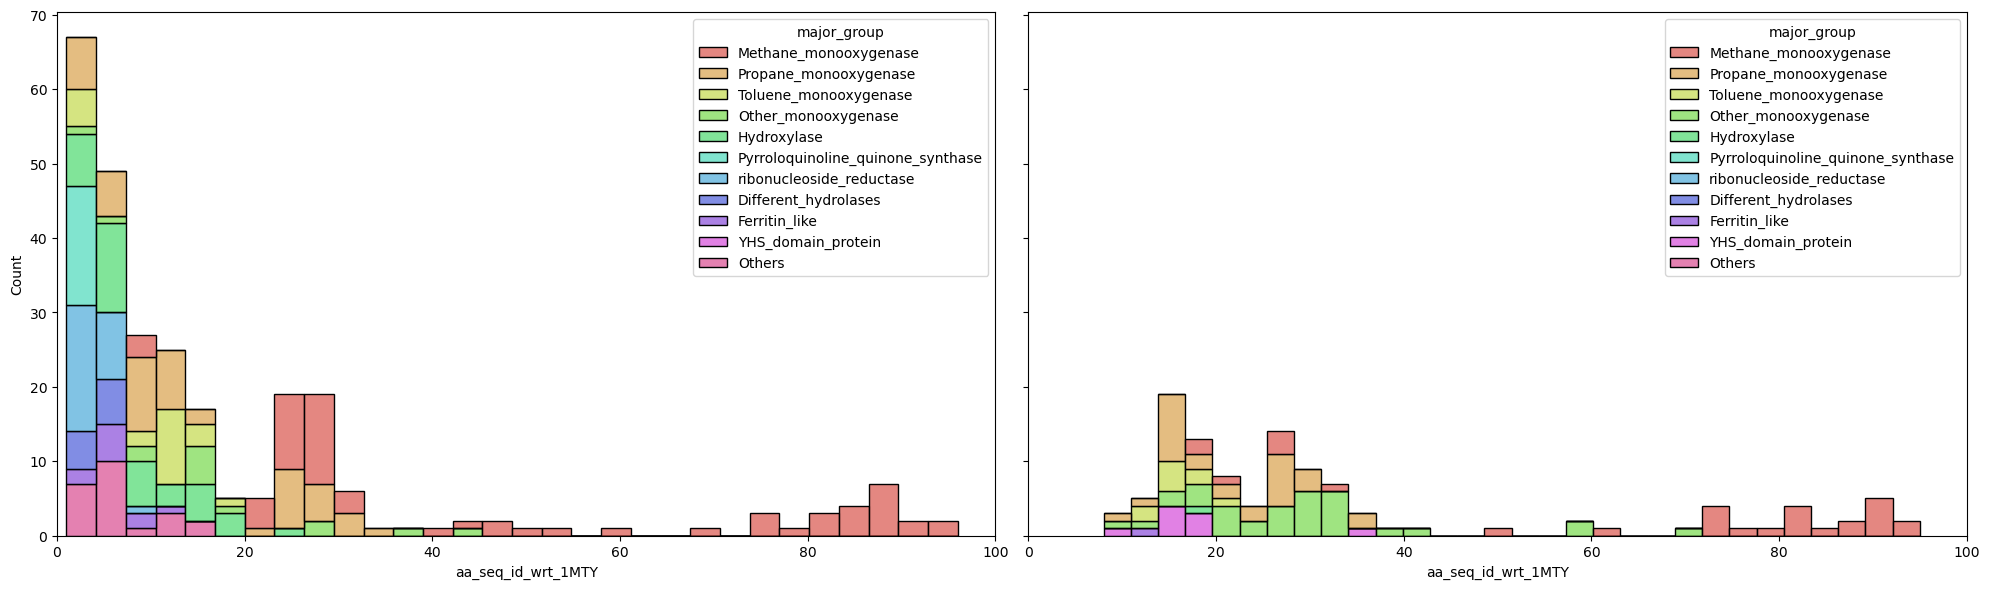

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8), sharex=False, sharey=True)
fig.set_size_inches(20, 6)

sns.histplot(data=filtered_foldseek_str_hits_df, x='aa_seq_id_wrt_1MTY', hue="major_group", hue_order=["Methane_monooxygenase", "Propane_monooxygenase", "Toluene_monooxygenase", "Other_monooxygenase", "Hydroxylase", "Pyrroloquinoline_quinone_synthase", "ribonucleoside_reductase", "Different_hydrolases", "Ferritin_like", "YHS_domain_protein", "Others"], multiple="stack", bins=30, ax=ax[0], palette="hls")
sns.histplot(data=filtered_blastp_seq_hits_df, x='aa_seq_id_wrt_1MTY', hue="major_group", hue_order=["Methane_monooxygenase", "Propane_monooxygenase", "Toluene_monooxygenase", "Other_monooxygenase", "Hydroxylase", "Pyrroloquinoline_quinone_synthase", "ribonucleoside_reductase", "Different_hydrolases", "Ferritin_like", "YHS_domain_protein", "Others"], multiple="stack", bins=30, ax=ax[1], palette="hls")

ax[0].set_xlim(0,100)
ax[1].set_xlim(0,100)
plt.tight_layout()

plt.savefig("/mnt/researchdrive/Kaustubh/MMO/Figures/MMO_sequence_structure_hit_seqid_comparison_barplot.svg")

### Identifying the common entries between the sequence and structure hits

In [20]:
key1 = set(filtered_foldseek_str_hits_df['target'])
key1_1 = {s.replace("AF-", "").replace("-F1-model_v4", "") for s in key1}
key2 = set(filtered_blastp_seq_hits_df['Accession'])

In [23]:
len(key1_1.intersection(key2)), key1_1.intersection(key2)

(19,
 {'A0A059XIN8',
  'A0A075IXI6',
  'A0A1L3N261',
  'A0A1S7IVX1',
  'A0A248Y4M6',
  'A0A2Z2HVE1',
  'A0A3M1WII4',
  'A0A402CFA6',
  'A0A660QWE8',
  'A0A6F8YTR6',
  'A0A6N7HWF8',
  'A0A7K0PFX0',
  'A0A7Y3M6H3',
  'A0A7Y3M808',
  'D5WPK2',
  'F8AVY5',
  'G3KFL0',
  'Q2XSA8',
  'Q2XSB0'})